### Import the Lirbraries and load the Dataset

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

df = pd.read_csv('original_data.csv')
df.head()

,Code,Type,Length ave. (nm),Diameter ave. (nm),Diameter std,BET (m2/g),Fe content,Co content,Ni content,Mg content,...,12.5 (ug/ml)_prolif,25 (ug/ml)_prolif,50 (ug/ml)_prolif,100 (ug/ml)_prolif,200 (ug/ml)_prolif,CEA: C.H.N.O (wt%),OH mmol/g,COOH mmol/g,Endotoxins (EU/mg),Genotoxicity
0,NRCWE- 040,PRISTINE,518.9,22.1,7.8,150,0.200,0.001,0.56,0.01,...,95,85,60,67,62,96,0.35,0.18,0.18,0
1,NRCWE- 041,OH,1005.0,26.9,10.1,152,0.130,0.001,0.31,0.02,...,79,62,50,54,59,97,1.69,0.84,NaN,0
2,NRCWE- 042,COOH,723.2,30.2,14.2,141,0.080,0.000,0.21,0.03,...,89,96,72,79,56,96,4.09,2.04,0.26,0
3,NRCWE- 043,PRISTINE,771.3,55.6,18.1,82,0.008,0.001,1.20,0.01,...,105,115,114,111,101,96,0.18,0.09,0.25,0
4,NRCWE- 044,OH,1330.0,32.7,13.6,74,0.004,0.002,1.04,0.02,...,99,96,95,91,77,97,0.23,0.11,0.27,1


### Start the Pre-process

Names are exluded from the pre-process and they will be stored as a txt file.

In [2]:
codes = list(df.pop('Code'))

In [3]:
with open('codes.txt', 'w') as file:
    for code in codes:
        file.write("%s\n" % code)

The "Diameter std" column will be used in order to create 2 more features: Diameter min. (nm) and Diameter max (nm).

In [4]:
df['Diameter min. (nm)'] = df['Diameter ave. (nm)'] - df['Diameter std']
df['Diameter max. (nm)'] = df['Diameter ave. (nm)'] + df['Diameter std']

df.drop('Diameter std', axis=1, inplace=True)

#### Description of the Dataset

In [5]:
pd.set_option('display.max_columns', 500)
df.describe(include='all')

,Type,Length ave. (nm),Diameter ave. (nm),BET (m2/g),Fe content,Co content,Ni content,Mg content,Mn content,Purity (%),Zave (batch),PdI (batch),Zave (12.5 ug/ml),PdI (12.5 ug/ml),Zave (200 ug/ml),PdI (200 ug/ml),ROS,Peak (ug/ml),0 (ug/ml)_via,12.5 (ug/ml)_via,25 (ug/ml)_via,50 (ug/ml)_via,100 (ug/ml)_via,200 (ug/ml)_via,0 (ug/ml)_prolif,12.5 (ug/ml)_prolif,25 (ug/ml)_prolif,50 (ug/ml)_prolif,100 (ug/ml)_prolif,200 (ug/ml)_prolif,CEA: C.H.N.O (wt%),OH mmol/g,COOH mmol/g,Endotoxins (EU/mg),Genotoxicity,Diameter min. (nm),Diameter max. (nm)
count,15,15.000000,15.000000,15.000000,15.000000,11.000000,13.000000,13.000000,10.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.0,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,13.000000,15.000000,15.000000,15.000000
unique,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,PRISTINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1521.746667,29.946667,152.800000,0.415247,0.122845,0.436892,0.149769,0.217800,97.104000,270.366667,0.370267,358.533333,0.479133,472.000000,0.474067,2.680000,10.623333,95.600000,96.333333,96.800000,97.333333,97.666667,97.933333,100.0,93.133333,90.666667,84.533333,80.400000,50.200000,95.600000,0.689333,0.34400,0.194615,0.400000,17.473333,42.420000
std,NaN,1441.940673,18.457862,75.574183,0.677763,0.123655,0.523760,0.271098,0.310938,3.302323,213.968264,0.103986,211.365921,0.133468,523.889029,0.087968,2.206549,2.867233,1.298351,1.397276,1.656157,1.759329,2.225395,1.667619,0.0,10.914385,15.314170,23.332585,18.531055,30.613256,2.667262,1.025284,0.51127,0.167064,0.507093,12.637612,25.012517
min,NaN,518.900000,11.000000,18.000000,0.004000,0.000000,0.001100,0.001000,0.001000,90.000000,168.100000,0.227000,145.000000,0.254000,128.000000,0.306000,0.000000,5.600000,93.000000,94.000000,93.000000,93.000000,91.000000,94.000000,100.0,75.000000,62.000000,50.000000,50.000000,10.000000,88.000000,0.030000,0.02000,0.010000,0.000000,0.000000,14.000000
25%,NaN,727.150000,16.400000,100.500000,0.007500,0.001000,0.003800,0.015000,0.001250,97.400000,182.550000,0.289500,178.000000,0.452500,215.000000,0.416500,1.600000,8.750000,94.500000,95.500000,96.000000,97.000000,97.500000,98.000000,100.0,86.000000,82.500000,66.000000,72.500000,24.500000,96.000000,0.210000,0.10000,0.030000,0.000000,9.650000,25.200000
50%,NaN,1005.000000,26.900000,152.000000,0.080000,0.106300,0.210000,0.020000,0.141000,98.700000,195.600000,0.385000,274.000000,0.477000,270.000000,0.484000,2.100000,12.500000,96.000000,97.000000,97.000000,98.000000,99.000000,98.000000,100.0,95.000000,96.000000,84.000000,79.000000,47.000000,96.000000,0.330000,0.16000,0.190000,0.000000,14.300000,37.000000
75%,NaN,1463.000000,31.450000,219.500000,0.470350,0.250000,1.001100,0.190000,0.297500,98.900000,207.350000,0.407000,513.000000,0.494000,456.000000,0.504000,3.200000,12.500000,96.500000,97.000000,98.000000,98.000000,99.000000,99.000000,100.0,99.000000,100.000000,101.500000,94.000000,60.500000,97.000000,0.630000,0.31500,0.270000,1.000000,17.950000,46.050000


In [6]:
df.Type.unique()

array(['PRISTINE', 'OH', 'COOH', 'NH2'], dtype=object)

The description of the dataset indicates that the all samples have the same value in the "0 (ug/ml)_prolif" column. Thus, this descriptor has no predictive power, and it should be removed. In addition to this observation, the "Type" column is filled with string values that have to be transformed, so that the ML models can be applied. Since the number of the unique "Type" values is small, One-Hot encoding will be applied. Finally, the "mean" row indicates that there is a great distance between the columns' values, hence, scaling should be applied. However, the "Endotoxines (EU/mg)" column, as well as the content of metals features, have missing values, so the gaps should be filled before scaling the features.

In [7]:
df.drop('0 (ug/ml)_prolif',axis=1,inplace=True)

In [8]:
#Extract the endpoint column, so that it will not be affected from the pre-process
endpoint = df.pop('Genotoxicity')

#One-Hot encode the data using pandas get_dummies
df = pd.get_dummies(df)

We continue with te pre-process by scanning the dataset for NaNs

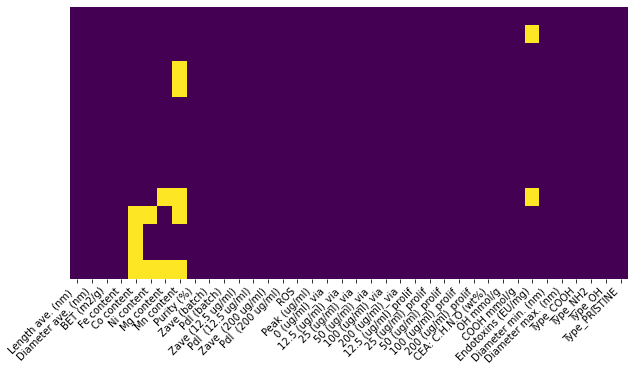

In [9]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.xticks(rotation=45,horizontalalignment='right');

From the above figure, we can see that the "Endotoxines (EU/mg)" column has indeed 2 missing values, whereas more values are missing from the metal content features. The endotoxines gaps will be filled with the mean of the "Endotoxines" values of the materials that were on the same Group. On the contrary, the metal content columns have more values missing, thus a new feature (% Total Impurities) will be created, as the sum of all metal contents. 

In [10]:
print('Empty Endotoxine values in analogues:')
for i in list(df[df['Endotoxins (EU/mg)'].isna()].index):
    print(codes[i], 'Index:',i)

Empty Endotoxine values in analogues:
NRCWE- 041 Index: 1
NM-400 Index: 10


In [11]:
df.at[1,'Endotoxins (EU/mg)'] = round(np.mean([df.iloc[0]['Endotoxins (EU/mg)'],
                                         df.iloc[2]['Endotoxins (EU/mg)']]),2)
df.at[10,'Endotoxins (EU/mg)'] = round(np.mean([df.iloc[11]['Endotoxins (EU/mg)'],
                                                df.iloc[12]['Endotoxins (EU/mg)'],
                                                df.iloc[13]['Endotoxins (EU/mg)'],
                                                df.iloc[14]['Endotoxins (EU/mg)']]),2)

In [12]:
# Convert NaNs to 0 in order to be able to add them
for col in ['Fe content','Co content', 'Ni content', 'Mg content', 'Mn content']:
    df[col][np.isnan(df[col])] = 0

# Create the new feature and delete the old ones
df['% Total Impurities'] = df['Fe content'] + df['Co content'] + df['Ni content'] + df['Mg content'] + df['Mn content']
df.drop(['Fe content','Co content', 'Ni content', 'Mg content', 'Mn content'], axis=1, inplace = True)

c:\users\user\desktop\test-jupyter\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Having filled the missing values, we continue by scaling the dataset.

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
scaled_data = pd.DataFrame(index=range(len(df)), columns=df.columns, data=scaler.transform(df))

c:\users\user\desktop\test-jupyter\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [14]:
scaled_data.head()

,Length ave. (nm),Diameter ave. (nm),BET (m2/g),Purity (%),Zave (batch),PdI (batch),Zave (12.5 ug/ml),PdI (12.5 ug/ml),Zave (200 ug/ml),PdI (200 ug/ml),ROS,Peak (ug/ml),0 (ug/ml)_via,12.5 (ug/ml)_via,25 (ug/ml)_via,50 (ug/ml)_via,100 (ug/ml)_via,200 (ug/ml)_via,12.5 (ug/ml)_prolif,25 (ug/ml)_prolif,50 (ug/ml)_prolif,100 (ug/ml)_prolif,200 (ug/ml)_prolif,CEA: C.H.N.O (wt%),OH mmol/g,COOH mmol/g,Endotoxins (EU/mg),Diameter min. (nm),Diameter max. (nm),Type_COOH,Type_NH2,Type_OH,Type_PRISTINE,% Total Impurities
0,0.000000,0.198214,0.559322,0.934783,0.036390,0.349333,0.020378,0.234910,0.067882,0.306306,0.220779,1.0,0.25,0.2,0.500000,0.666667,0.750,0.833333,0.526316,0.433962,0.140845,0.278689,0.495238,0.8,0.078818,0.079208,0.34,0.332558,0.206494,0.0,0.0,0.0,1.0,0.134906
1,0.093822,0.283929,0.567797,1.000000,0.066958,0.730667,0.132460,0.375204,0.054205,0.570571,0.389610,1.0,0.00,0.0,0.500000,0.500000,0.625,0.666667,0.105263,0.000000,0.000000,0.065574,0.466667,0.9,0.408867,0.405941,0.42,0.390698,0.298701,0.0,0.0,1.0,0.0,0.075646
2,0.039432,0.342857,0.521186,1.000000,0.035861,0.413333,0.014556,0.097879,0.031408,0.357357,0.103896,1.0,0.25,0.2,0.500000,0.666667,0.875,0.833333,0.368421,0.641509,0.309859,0.475410,0.438095,0.8,1.000000,1.000000,0.50,0.372093,0.394805,1.0,0.0,0.0,0.0,0.048780
3,0.048716,0.796429,0.271186,0.923913,0.011777,0.026667,0.000000,0.000000,0.013171,0.000000,0.298701,1.0,0.75,0.4,0.833333,0.833333,1.000,0.833333,0.789474,1.000000,0.901408,1.000000,0.866667,0.8,0.036946,0.034653,0.48,0.872093,0.775325,0.0,0.0,0.0,1.0,0.219889
4,0.156550,0.387500,0.237288,0.934783,0.045124,0.024000,0.425036,0.365416,0.241641,0.822823,0.220779,1.0,0.75,0.4,0.666667,0.833333,0.875,0.833333,0.631579,0.641509,0.633803,0.672131,0.638095,0.9,0.049261,0.044554,0.52,0.444186,0.419481,0.0,0.0,1.0,0.0,0.190736


### Save the dataset

In [16]:
scaled_data['Genotoxicity'] = endpoint

In [17]:
scaled_data.to_csv('pre-precessed_dataset.csv',index=False)